In [2]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

In [3]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

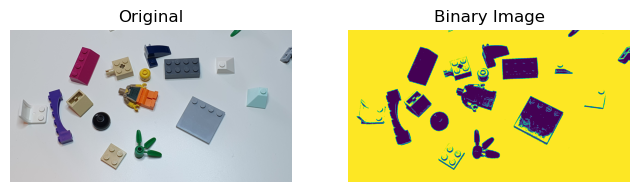

In [4]:
# Load the image (replace 'lego_4_small.png' with the actual path)
image = io.imread('lego_4_small.png')

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Otsu's thresholding
threshold_value = threshold_otsu(gray_image)
binary_image = gray_image > threshold_value  # Binary image

# Display the original and binary images
show_comparison(image, binary_image, "Binary Image")

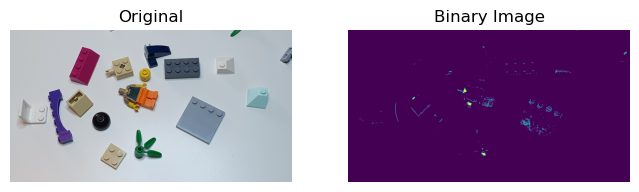

In [5]:
# Remove objects touching the border
cleaned_binary_image = segmentation.clear_border(binary_image)

# Display the original and binary images
show_comparison(image, cleaned_binary_image, "Binary Image")

In [6]:
from skimage.morphology import opening, closing, disk

# Create a disk-shaped structuring element with radius 5
selem = disk(5)

# Perform morphological closing to fill holes
closed_image = closing(cleaned_binary_image, selem)

# Perform morphological opening to remove small noise
final_cleaned_image = opening(closed_image, selem)

In [7]:
label_img = measure.label(final_cleaned_image)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 17


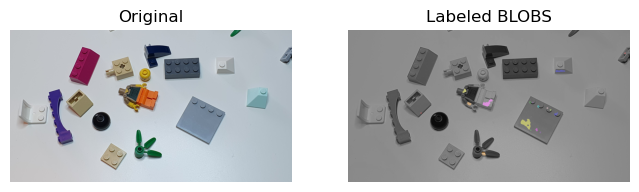

In [8]:
# Apply label2rgb to create a color visualization of the labeled blobs
image_label_overlay = label2rgb(label_img, image=image, bg_label=0)

# Display the original and labeled images
show_comparison(image, image_label_overlay, "Labeled BLOBS")

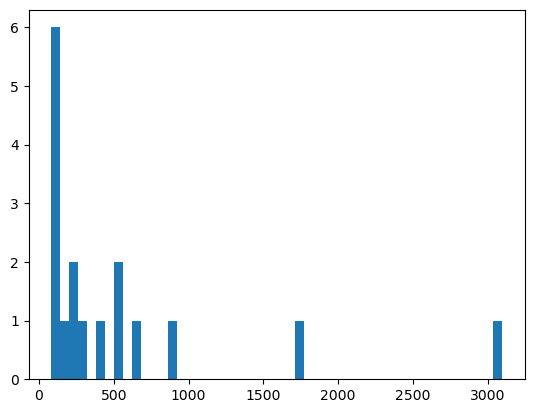

In [9]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

In [12]:
img_org = io.imread('Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=150)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

ValueError: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package